In [1]:
# Import required packages.

from numpy import random as rdm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as spy
import numpy as np

In [2]:
# Remove warnings

import warnings
warnings.filterwarnings("ignore")

### Genarate Age data

In [3]:

rdm.seed(10) # Fix the seed for random
ages = rdm.randint(18, 100, size=40) # Genarating random ages between 18 to 100 years
print(ages)


[27 33 82 46 47 26 91 18 58 54 34 29 72 80 51 90 96 67 69 72 95 87 31 43
 31 48 48 30 83 49 75 54 45 36 95 40 41 29 46 92]


### Mean

1. Average value of a variable/feature/list is called mean.
2. Mean is calculated by dividing the sum of given numbers by the total number of observations.  

#### Formula:
Mean = (Sum of all the observations/Total number of observations)


In [4]:
# Average (mean) of ages 
print('Mean of ages :',np.mean(ages))

Mean of ages : 56.0


### Median

1. The median is the middle value in a list ordered from smallest to largest. 

In [5]:
# Medien
print('Median of ages :',np.median(ages))

Median of ages : 48.5


### Mode

1. The mode is the most frequently occurring value on the list or feature.

In [6]:
# Mode
md = spy.stats.mode(ages)
print(f'Mode information of ages : {md}\nMode = {md.mode}\nCount = {md.count}')

Mode information of ages : ModeResult(mode=array([29]), count=array([2]))
Mode = [29]
Count = [2]


### Standard deviation

1. Standard deviation is a statistical measure that explains how much data clusters around the mean.
2. The square root of the average of squares of deviation of each data point from mean is called Standard deviation
3. It is the average of the squared differences from the Mean.
4. It is denoted with sigma.


In [7]:
# Standard Deviation
print(spy.stats.tstd(ages))

print(np.std(ages))

23.573126811950672
23.276597689524987


### Plot a box and swarm plots to understand mean and standard deviation.

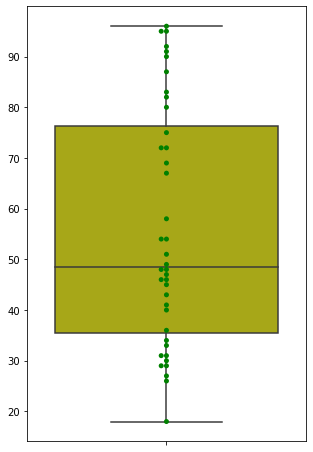

In [8]:
plt.figure(figsize=(5,8))
ax = sns.boxplot(y = ages, color='y')
ax = sns.swarmplot(y = ages, color='g')

### Sumup Above Code

In [17]:
# Import required packages.

from numpy import random as rdm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as spy
import numpy as np


# Remove warnings
import warnings
warnings.filterwarnings("ignore")


# Define a function
def mmm_std(sgl_lst):
    
    # Calculate the mean, median, mode, standard deviation.
    mean = np.mean(sgl_lst)
    median = np.median(sgl_lst)
    mode = spy.stats.mode(sgl_lst)
    std = spy.stats.tstd(sgl_lst)
    
    # Print data
    display(sgl_lst)
    
    
    # Print details
    print(f'Mean   : {mean}\nMedian : {median}\nMode   : mode = {mode.mode[0]}, \
    count = {mode.count[0]}\n\nStanderd deviation: {std}')
    
    data = std_vls(mean, std, sgl_lst)
    display(data)
    
    sd_plot(mean, sgl_lst, data)
    
    # Show boxplot
    plt.figure(figsize=(5,8))
    ax = sns.boxplot(y = ages, color='y')
    ax = sns.swarmplot(y = ages, color='g')
    plt.show()
    

    
def std_vls(mean, std, sgl_lst):

    # SD calculations
    sd_1 = [mean-std, mean+std]
    sd_2 = [mean-(2*std), mean+(2*std)]
    sd_3 = [mean-(3*std), mean+(3*std)]
    
    s = len(sgl_lst)
    sd_1.append((len(sgl_lst[(sgl_lst > sd_1[0]) & (sgl_lst < sd_1[1])]) / s )*100)
    
    sd_2n = len(sgl_lst[(sgl_lst > sd_2[0]) & (sgl_lst < sd_1[0])])
    sd_2p = len(sgl_lst[(sgl_lst > sd_1[1]) & (sgl_lst < sd_2[1])])
    
    sd_3n = len(sgl_lst[(sgl_lst > sd_3[0]) & (sgl_lst < sd_2[0])])
    sd_3p = len(sgl_lst[(sgl_lst > sd_2[1]) & (sgl_lst < sd_3[1])])
    
    sd_2.append(((sd_2n + sd_2p) / s ) * 100)
    sd_3.append(((sd_3n + sd_3p) / s ) * 100)
    
    data = pd.DataFrame([sd_1, sd_2, sd_3], columns=['Left', 'Right', '% of data'] )
    s = pd.Series(['First SD', 'Second SD', 'Third SD'])
    data.set_index(s, inplace = True)
    
    
    return data


def sd_plot(mean, sgl_lst, data):
    s= len(sgl_lst)
    end = range(1, s+1)
    
    plt.xlabel('feature')
    plt.ylabel('Index')
    plt.scatter(sgl_lst, end)
    plt.plot([mean] * s, end)
    
    plt.plot([data['Left']['First SD']] * s, end, color= 'g')
    plt.plot([data['Right']['First SD']] * s, end, color= 'g')
    
    plt.plot([data['Left']['Second SD']] * s, end, color= 'y')
    plt.plot([data['Right']['Second SD']] * s, end, color= 'y')
    
    plt.plot([data['Left']['Third SD']] * s, end, color= 'r')
    plt.plot([data['Right']['Third SD']] * s, end, color= 'r')
    plt.show()
    
    sns.histplot(data=sgl_lst, kde=True, color='g')
    plt.show()

array([64, 73, 87, 19, 90, 68, 27, 76, 73, 73, 75, 54, 68, 62, 56, 70, 21,
       18, 73, 39, 39, 91, 56, 74, 84, 64, 48, 26, 67, 84, 76, 50, 58, 60,
       63, 51, 50, 46, 21, 97])

Mean   : 59.775
Median : 63.5
Mode   : mode = 73,     count = 4

Standerd deviation: 21.090145347276078


,Left,Right,% of data
First SD,38.684855,80.865145,70.0
Second SD,17.594709,101.955291,30.0
Third SD,-3.495436,123.045436,0.0


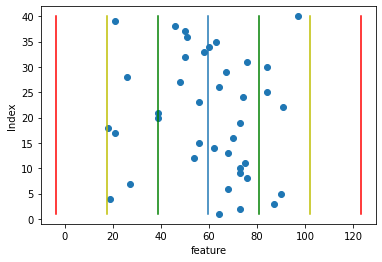

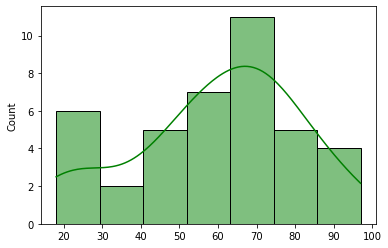

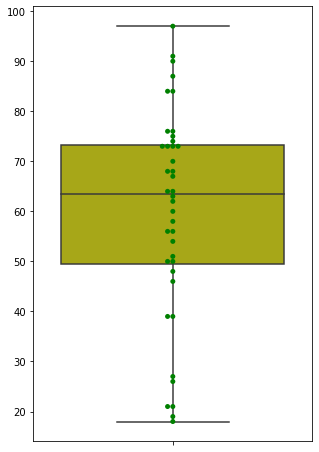

In [18]:

rdm.seed(4) # Fix the seed for random (2,)
ages = rdm.randint(18, 100, size=40) # Genarating random ages between 18 to 100 years

# We can get all details by calling mmm_std function
mmm_std(ages)
